In [1]:
from lale.grammar import Grammar
from lale.operators import make_choice
from lale import wrap_imported_operators

# Simple: First example

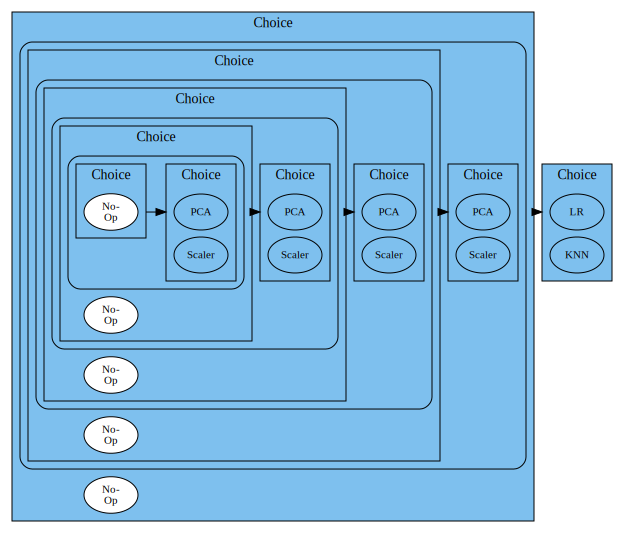

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from lale.lib.lale import NoOp
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = (NoOp | g.transformer) >> g.prim_est
g.transformer = (NoOp | g.transformer) >> g.prim_tfm

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler

generated = g.unfold(6)
generated.visualize()

## Training

100%|██████████| 6/6 [00:04<00:00,  1.40trial/s, best loss: -0.9261575551782683]


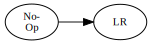

In [3]:
from lale.lib.lale import Hyperopt
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.load_iris_df()

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

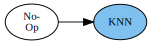

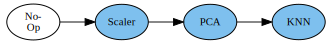

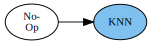

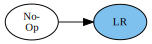

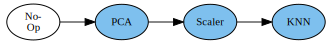

In [4]:
pool = {g.sample(10) for _ in range(5)}
for tree in pool:
    tree.visualize()

100%|██████████| 6/6 [00:03<00:00,  1.93trial/s, best loss: -0.9383575551782682]


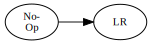

In [5]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# Grammar that exercices all combinators

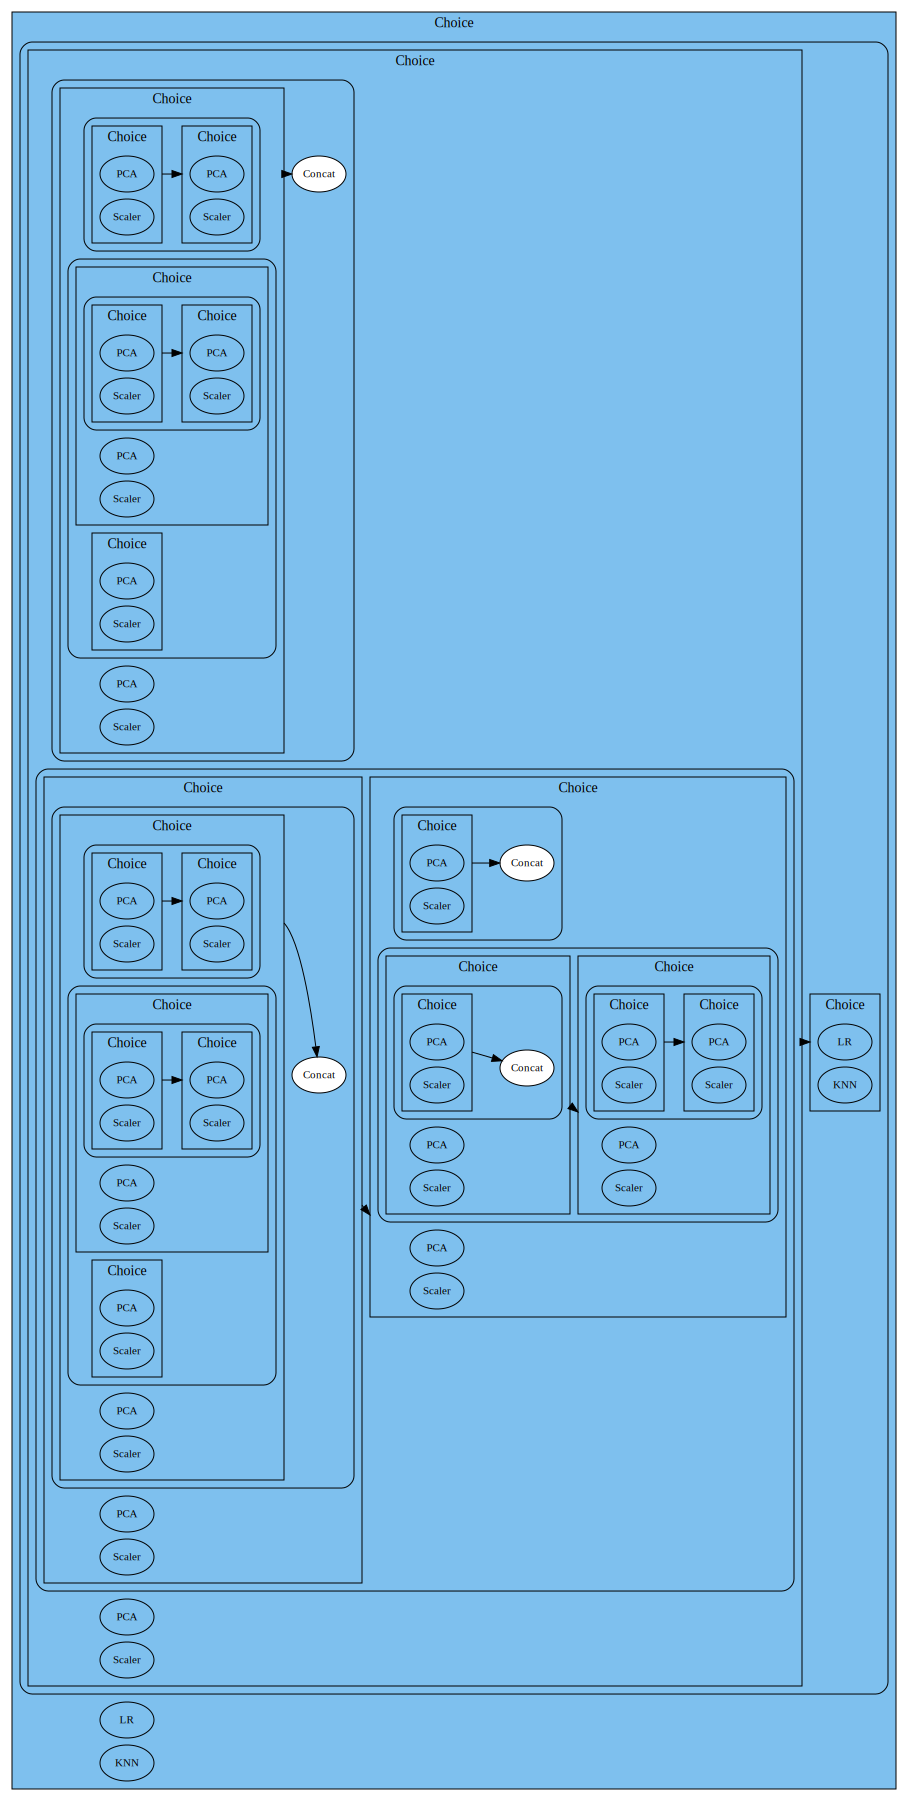

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.ensemble import AdaBoostClassifier as Boost
from lale.lib.lale import ConcatFeatures as Concat
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.term_est | g.transformer >> g.term_est
g.term_est    = g.prim_est #| g.ensemble
#g.ensemble    = Boost ( base_estimator = LR )
g.transformer = g.union_tfm | g.union_tfm >> g.transformer
g.union_tfm   = g.prim_tfm | g.union_body >> Concat
g.union_body  = g.transformer | g.transformer & g.union_body

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler
g.ensembler   = Boost

generated = g.unfold(7)
generated.visualize()

100%|██████████| 3/3 [00:01<00:00,  1.58trial/s, best loss: -0.8889151103565365]


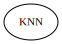

In [7]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

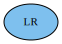

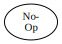

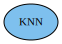

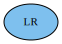

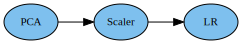

In [8]:
pool = {g.sample(20) for _ in range(5)}
for tree in pool:
    tree.visualize()

100%|██████████| 6/6 [00:02<00:00,  2.80trial/s, best loss: -0.9505575551782683]


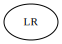

In [9]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# recipe: grammar from this [paper](https://link.springer.com/chapter/10.1007/978-3-319-55696-3_16)

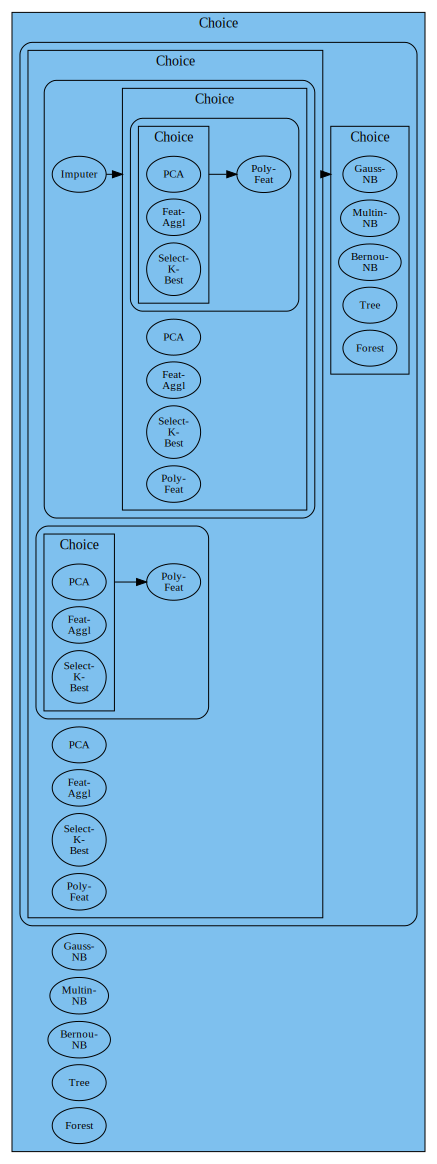

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration as FeatAggl
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.naive_bayes import MultinomialNB as MultinNB
from sklearn.naive_bayes import BernoulliNB as BernouNB
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.feature_selection import SelectKBest
wrap_imported_operators()

g = Grammar()

g.start = g.algorithm | g.preprocessing >> g.algorithm
g.preprocessing = g.imputation >> g.dimensionality_definition | g.dimensionality_definition
g.dimensionality_definition = g.feature_selection >> g.feature_construction | g.feature_selection | g.feature_construction
g.feature_selection = g.unsupervised | g.supervised 
g.algorithm = g.naive_bayes | g.trees

g.imputation = Imputer
g.supervised = SelectKBest
g.unsupervised = PCA | FeatAggl
g.feature_construction = PolyFeat
g.naive_bayes = GaussNB | MultinNB | BernouNB
g.trees = Tree | Forest


generated = g.unfold(5)
generated.visualize()

100%|██████████| 3/3 [00:02<00:00,  1.37trial/s, best loss: -0.9139575551782683]


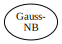

In [11]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

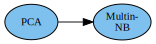

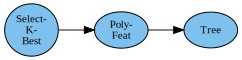

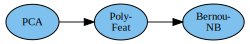

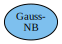

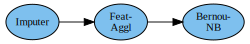

In [12]:
import sys
pool = {g.sample(30) for _ in range(5)}
for tree in pool:
    if tree is None:
        print('None', file=sys.stderr)
    else:
        tree.visualize()

100%|██████████| 6/6 [00:02<00:00,  2.24trial/s, best loss: -0.9139575551782683]


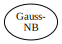

In [13]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# alphad3m: Grammar from this [paper](https://www.automl.org/wp-content/uploads/2019/06/automlws2019_Paper34.pdf)

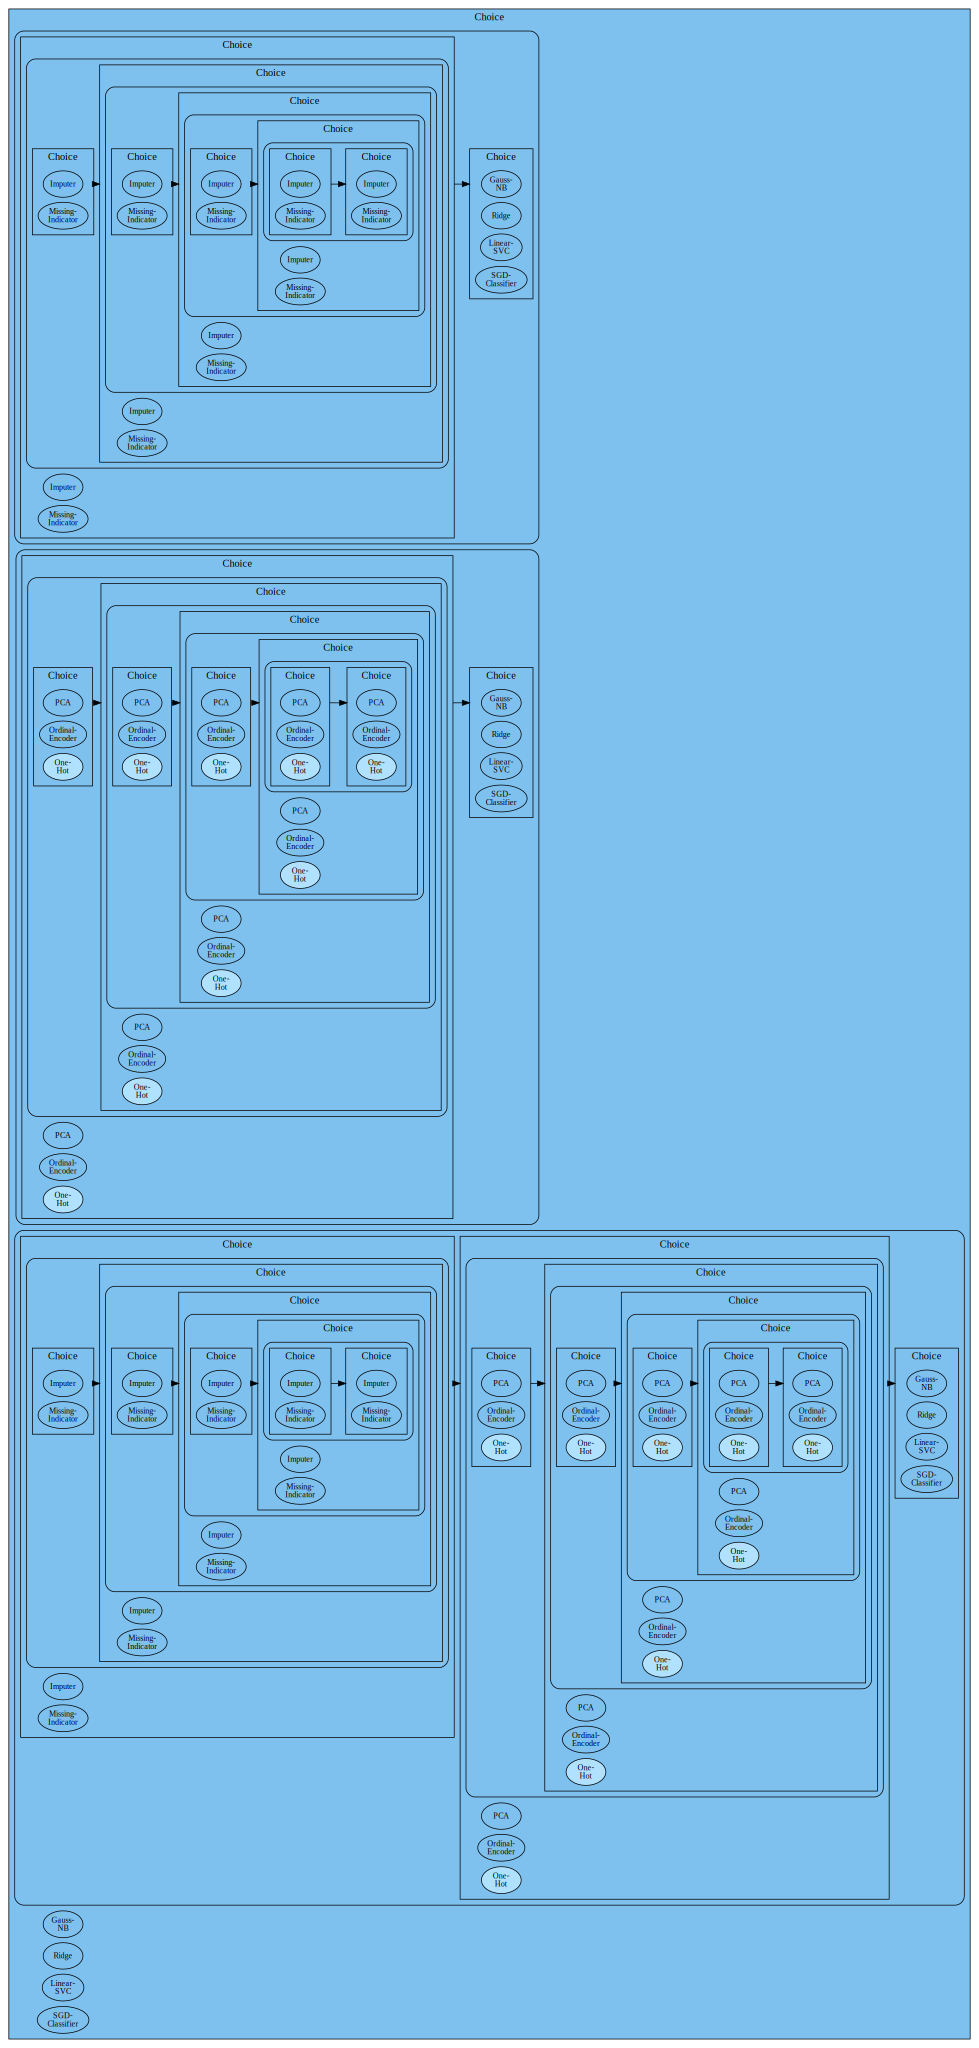

In [14]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.preprocessing import OrdinalEncoder
wrap_imported_operators()

g = Grammar()

g.start  = g.est | g.clean >> g.est | g.tfm >> g.est | g.clean >> g.tfm >> g.est
g.clean  = g.clean1 >> g.clean | g.clean1
g.tfm    = g.tfm1 >> g.tfm | g.tfm1

g.clean1 = Imputer | MissingIndicator
g.tfm1   = PCA | OrdinalEncoder | OneHot(handle_unknown='ignore')
g.est    = GaussNB | Ridge  | LinearSVC | SGDClassifier

generated = g.unfold(6)
generated.visualize()

100%|██████████| 3/3 [00:04<00:00,  1.66s/trial, best loss: -0.45581188455008487]


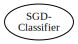

In [15]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
if trained.get_pipeline() is None:
    print('None', file=sys.stderr)
else:
    trained.get_pipeline().visualize()

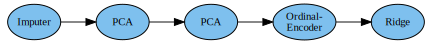

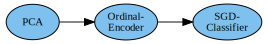

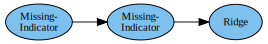

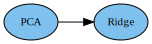

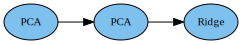

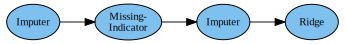

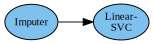

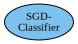

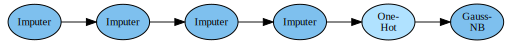

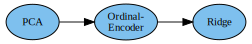

In [21]:
pool = {g.sample(10) for _ in range(10)}
for tree in pool:
    tree.visualize()

100%|██████████| 10/10 [00:09<00:00,  1.04trial/s, best loss: -0.9045959105402828]


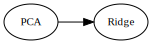

In [23]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=10, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# TPot: Grammar inferred from this [paper](https://dl.acm.org/doi/pdf/10.1145/2908812.2908918)

In [24]:
# from sklearn.preprocessing import StandardScaler as SScaler
# from sklearn.preprocessing import RobustScaler as RScaler
# from sklearn.preprocessing import PolynomialFeatures as PolyFeat
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.tree import DecisionTreeClassifier as Tree
# from sklearn.ensemble import RandomForestClassifier as Forest
# from sklearn.ensemble import GradientBoostingClassifier as Gradient
# from sklearn.svm import SVC as SVM
# from sklearn.linear_model import LogisticRegression as LR
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from lale.lib.lale import ConcatFeatures as Concat

from sklearn.preprocessing import StandardScaler as PreProcess
from sklearn.decomposition import PCA as Decomposition
from sklearn.feature_selection import SelectKBest as Feature
from sklearn.tree import DecisionTreeClassifier as Model
from lale.lib.lale import ConcatFeatures as Concat
from lale.lib.lale import NoOp

wrap_imported_operators()

g = Grammar()

g.start = g.tree >> g.model
g.tree = g.node | g.tree >> g.node | (g.tree & g.tree) >> Concat
g.node = g.preprocessing | g.decomposition | g.feature_selection | g.model \
#        | (g.node & g.node) >> Concat \
#        | g.node >> g.node


g.preprocessing = PreProcess
g.decomposition = Decomposition
g.feature_selection = Feature
g.model = Model

# g.preprocessing = SScaler | RScaler | PolyFeat
# g.decomposition = PCA
# g.feature_selection = SelectKBest | RFE | SelectPercentile | VarianceThreshold
# g.model = Tree | Forest | Gradient | SVM | LR | KNN


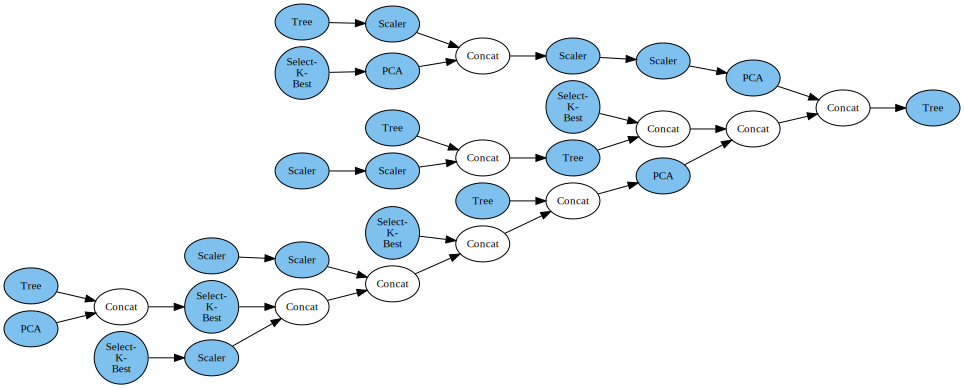

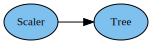

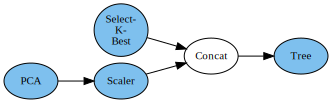

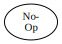

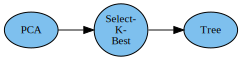

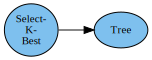

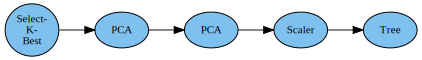

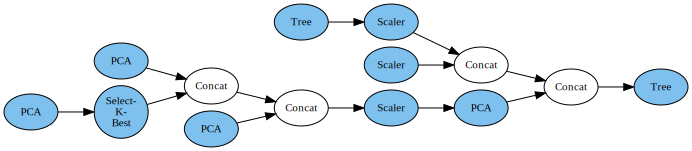

In [25]:
pool = {g.sample(15) for _ in range(10)}
for tree in pool:
    tree.visualize()

100%|██████████| 6/6 [00:10<00:00,  1.82s/trial, best loss: 1.4095161290322582]


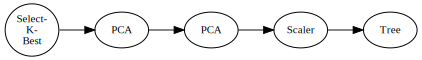

In [26]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()